In [2]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sp
import datetime

import matplotlib.pylab as plt
import os

In [3]:
data=pd.read_excel(r"G:\Documents\Documents\Finance work\MC test.xlsx",index_col=0)
data.index = pd.to_datetime(data.index)

In [5]:
wt=np.array([0.25,0.3,0.3,0.15])

In [6]:
ret=data.pct_change()

In [7]:
cov_matrix=ret.cov()

In [8]:
n=[-0.002,0.003,-0.0002,0.004]

In [9]:
cov_matrix

,Nifty,Dow,Dax,FTSE
Nifty,0.005738,-0.000596,-0.000974,-0.000933
Dow,-0.000596,0.017971,-0.000511,-0.001371
Dax,-0.000974,-0.000511,0.016428,0.001402
FTSE,-0.000933,-0.001371,0.001402,0.030052


In [10]:
avg_ret=ret.mean()

In [11]:
avg_ret

Nifty    0.002774
Dow      0.008242
Dax      0.007737
FTSE     0.014274
dtype: float64

In [12]:
port_mean=avg_ret.dot(wt)


In [13]:
port_std=np.sqrt(np.dot(wt.T,np.dot(cov_matrix,wt)))

In [14]:
#Set the number of iterations to 10000 and define an array to hold the simulation results; initially set to all zeros
stock=data.columns
num_iterations = 10000
#matrix([row,col] for 7 rows and 10000 cols (simulation results))
simulation_res = np.zeros((4+len(stock)-1,num_iterations))

In [15]:
for i in range(num_iterations):
#Select random weights and normalize to set the sum to 1
        weights = np.array(np.random.random(4))
        weights /= np.sum(weights)
        #Calculate the return and standard deviation for every step
        port_return=np.dot(avg_ret,weights)
        port_vol=np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
        #Store all the results in a defined array
        simulation_res[0,i] = port_return
        simulation_res[1,i] = port_vol
        #Sharpe ratio 
        simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]
        #save the weights for each stock in below rows
        for j in range(len(weights)):
                simulation_res[j+3,i] = weights[j]

In [17]:
sim_frame = pd.DataFrame(simulation_res.T,columns=['ret','stdev','sharpe',stock[0],stock[1],stock[2],stock[3]])
print (sim_frame.head (5))
print (sim_frame.tail (5))

        ret     stdev    sharpe     Nifty       Dow       Dax      FTSE
0  0.005185  0.059583  0.087017  0.598097  0.314845  0.047727  0.039331
1  0.007906  0.066100  0.119612  0.291573  0.102824  0.366237  0.239366
2  0.008807  0.071375  0.123394  0.131030  0.390766  0.245148  0.233056
3  0.008123  0.066645  0.121888  0.374517  0.215178  0.083481  0.326824
4  0.007411  0.060288  0.122929  0.440368  0.197199  0.093162  0.269271
           ret     stdev    sharpe     Nifty       Dow       Dax      FTSE
9995  0.007975  0.080793  0.098708  0.197219  0.051422  0.569150  0.182208
9996  0.008517  0.068020  0.125210  0.195440  0.204906  0.347767  0.251887
9997  0.007897  0.066641  0.118506  0.258759  0.128092  0.402018  0.211132
9998  0.008196  0.064427  0.127212  0.268174  0.333818  0.149964  0.248045
9999  0.007914  0.060433  0.130953  0.292886  0.267060  0.211236  0.228818


In [18]:
#Spot the position of the portfolio with highest Sharpe Ratio
max_sharpe = sim_frame.iloc[sim_frame['sharpe'].idxmax()]
#Spot the position of the portfolio with minimum Standard Deviation
min_std = sim_frame.iloc[sim_frame['stdev'].idxmin()]
print ("The portfolio for max Sharpe Ratio:\n", max_sharpe)
print ("The portfolio for min risk:\n", min_std)

The portfolio for max Sharpe Ratio:
 ret       0.007809
stdev     0.059501
sharpe    0.131238
Nifty     0.308745
Dow       0.242776
Dax       0.221807
FTSE      0.226672
Name: 9370, dtype: float64
The portfolio for min risk:
 ret       0.006075
stdev     0.051562
sharpe    0.117820
Nifty     0.506387
Dow       0.177189
Dax       0.199886
FTSE      0.116538
Name: 9386, dtype: float64


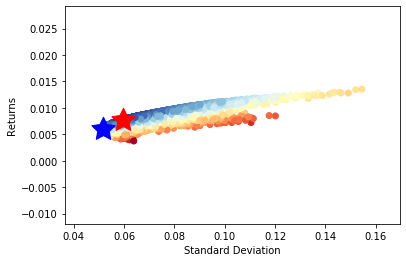

In [19]:
#Create a scatter plot coloured by various Sharpe Ratios with standard deviation on the x-axis and returns on the y-axis
plt.scatter(sim_frame.stdev,sim_frame.ret,c=sim_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
#plt.ylim(0,.003)
#plt.xlim(0.0075,0.012)
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='r',s=600)
#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(min_std[1],min_std[0],marker=(5,1,0),color='b',s=600)
plt.show()